# Recommendation System

supported by.
https://www.kaggle.com/abdelrahmanzied/netflix-movies-recommendation-system

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
# import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn.feature_extraction.text import TfidfVectorizer
# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# nlp = spacy.load('en_core_web_sm')
import difflib
from sklearn.metrics.pairwise import cosine_similarity
sns.set()
warnings.filterwarnings("ignore")

In [4]:
movies = pd.read_csv('./film_festival_ver3.csv')
movies.head(-5)

,year,film_festival,title,director,field,award,genre,plot,rating,runtime,prodYear,actors,img_link,stills
0,2021,소리아 국제단편영화제,조지아,제이 박,NaN,NaN,"가족,범죄",병들고 가난한 부부가 딸의 억울한 죽음을 규명하기 위해 나선다. 가해자를 밝히지도 ...,12세관람가,29.0,2020.0,"이양희,이채경,김규남",https://ssl.pstatic.net/imgmovie/mdi/mit110/19...,http://file.koreafilm.or.kr/thm/01/copy/00/55/...
1,2021,보고타 단편영화제,미미(美味): 궁극의 식사,한재원,경쟁부문,NaN,"코메디,공포",미각을 잃은 미식 유튜버 성호는 어딘가 기괴한 음식점에 방문한다.,NaN,19.0,2020.0,"김최용준,정경임,이종윤",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/59/...
2,2021,엑상프로방스 국제단편영화제,아이즈앤혼즈,임채린,International Competition of Experimental Shorts,NaN,기타,NaN,NaN,NaN,NaN,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,NaN
3,2021,서울독립영화제,절해고도,김미영,페스티벌 초이스,NaN,드라마,절해고도. '육지에서 멀리 떨어진 바다의 외딴 섬'이라는 뜻을 지닌 제목은 삶의 표...,NaN,116.0,2021.0,"박종환,이연,강경헌",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/59/...
4,2021,서울독립영화제,장갑을 사러,이현주,단편경쟁,NaN,멜로/로맨스,피아노를 가르치는 인경은 연인의 일본 발령 소식에 일본어 학원을 다니기 시작한다. ...,NaN,29.0,2021.0,"김정민,양종욱,김하람",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/59/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,2000,정동진독립영화제,심청,유종미,단편과 애니 2,NaN,드라마,"딸을 극단적으로 사랑하는 눈먼 아버지, 무당이었던 어머니가 그리운 눈먼 아버지의 딸...",NaN,30.0,2000.0,"백은경,유순철,이동현",https://ssl.pstatic.net/imgmovie/mdi/mit110/02...,http://file.koreafilm.or.kr/thm/01/copy/00/31/...
3353,2000,정동진독립영화제,1979년 10월 28일 일요일 맑음,권종관,재밌는 단편모음 2,NaN,드라마,"1979년 10월 28일 일요일, 영환의 부모님은 아침 일찍 시골에 내려가신다. 엄...",NaN,17.0,1999.0,"강혜은,박진아,이동근",https://ssl.pstatic.net/imgmovie/mdi/mit110/03...,http://file.koreafilm.or.kr/thm/01/copy/00/36/...
3354,2000,정동진독립영화제,81 해적 디스코 왕이 되다,김동원,단편과 애니 2,NaN,기타,NaN,NaN,NaN,NaN,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/03...,NaN
3355,2000,정동진독립영화제,미메시스 TV - 에피소드 1,전승일,단편과 애니 2,NaN,드라마,사람이 컴퓨터 앞에 앉아 있다. 밖에는 디스켓이 날아다니고 그는 무료함을 느낀다. ...,NaN,3.0,2000.0,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/04...,http://file.koreafilm.or.kr/thm/01/copy/00/31/...


## DATA columns

In [5]:
movies.columns

Index(['year', 'film_festival', 'title', 'director', 'field', 'award', 'genre',
       'plot', 'rating', 'runtime', 'prodYear', 'actors', 'img_link',
       'stills'],
      dtype='object')

In [6]:
movies.count()

year             3362
film_festival    3362
title            3362
director         3362
field            3164
award             381
genre            3362
plot             3055
rating            627
runtime          3029
prodYear         3077
actors           2278
img_link         2763
stills           2513
dtype: int64

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362 entries, 0 to 3361
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           3362 non-null   int64  
 1   film_festival  3362 non-null   object 
 2   title          3362 non-null   object 
 3   director       3362 non-null   object 
 4   field          3164 non-null   object 
 5   award          381 non-null    object 
 6   genre          3362 non-null   object 
 7   plot           3055 non-null   object 
 8   rating         627 non-null    object 
 9   runtime        3029 non-null   float64
 10  prodYear       3077 non-null   float64
 11  actors         2278 non-null   object 
 12  img_link       2763 non-null   object 
 13  stills         2513 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 367.8+ KB


## CONTENTS

In [8]:
movies['genre'].unique()

array(['가족,범죄', '코메디,공포', '기타', '드라마', '멜로/로맨스', '드라마,멜로/로맨스', '사회,지역',
       '드라마,가족,아동', '드라마,인물', '드라마,사회물(경향)', '드라마,뮤직', '코메디,문화,사회',
       '사회,인물', '코메디', '실험', '사회', '코메디,멜로/로맨스', '드라마,스포츠', '사회,가족', 'SF',
       '문화', '사회,인권', '드라마,어드벤처,판타지,가족,아동', '인물,가족,뮤직', '멜로/로맨스,드라마,청춘영화',
       '인물', '공포,판타지,스릴러', '역사', '드라마,시대극/사극', '드라마,판타지', '드라마,가족',
       '인물,가족', '멜로/로맨스,드라마', '드라마,동성애', '지역,자연ㆍ환경', '역사,사회', '지역,역사',
       '뮤직,드라마', '드라마,코메디,가족', '뮤직', '공포', '미스터리,스릴러', '지역,자연ㆍ환경,인물',
       '스릴러', '문화,기업ㆍ기관ㆍ단체', '멜로드라마', '드라마,스릴러', '드라마,하이틴(고교)', '가족,드라마',
       'SF,판타지,공포', '드라마,멜로/로맨스,로드무비', 'SF,실험', '인물,사회', '가족,아동,드라마',
       '인물,사회,역사', '자연ㆍ환경', '기업ㆍ기관ㆍ단체,지역', '공포,판타지', '드라마,반공/분단',
       '드라마,멜로/로맨스,가족,코메디', '드라마,액션', '판타지', '드라마,미스터리,공포', '스릴러,스포츠',
       '드라마,공포', '가족,하이틴(고교)', '드라마,청춘영화,하이틴(고교),인물', '공포,스릴러,미스터리',
       '드라마,코메디,공포', '코메디,가족,판타지', '코메디,드라마', '드라마,코메디', '지역,사회',
       '드라마,사회물(경향),인권', '코메디,액션', '사회물(경향),인물,인권', '인권', 'SF,가족,재난',
       '가족,지역,사

In [52]:
movies['genre'].nunique()

308

In [49]:
movies['genre'].value_counts()

드라마                   1311
기타                     441
코메디                     61
드라마,가족                  47
실험                      46
                      ... 
시대극/사극,드라마,사회물(경향)       1
드라마,미스터리,코메디             1
문화,사회                    1
인권,범죄                    1
SF,가족,재난                 1
Name: genre, Length: 308, dtype: int64

In [57]:
genre_df = pd.DataFrame(
    movies['genre'].str.split(',').tolist(),
    columns=['g1', 'g2', 'g3', 'g4', 'g5']
)
genre_df

,g1,g2,g3,g4,g5
0,가족,범죄,None,None,None
1,코메디,공포,None,None,None
2,기타,None,None,None,None
3,드라마,None,None,None,None
4,멜로/로맨스,None,None,None,None
...,...,...,...,...,...
2772,드라마,None,None,None,None
2773,드라마,None,None,None,None
2774,코메디,드라마,스릴러,None,None
2775,실험,None,None,None,None


In [78]:
type(genre_df)

pandas.core.frame.DataFrame

In [79]:
genre_numpy = genre_df.to_numpy()
genre_numpy

array([['가족', '범죄', None, None, None],
       ['코메디', '공포', None, None, None],
       ['기타', None, None, None, None],
       ...,
       ['코메디', '드라마', '스릴러', None, None],
       ['실험', None, None, None, None],
       ['드라마', None, None, None, None]], dtype=object)

In [138]:
genre_all = pd.concat([genre_df['g1'], genre_df['g2'], genre_df['g3'], genre_df['g4'], genre_df['g5']], axis = 0)
genre_all

0           가족
1          코메디
2           기타
3          드라마
4       멜로/로맨스
         ...  
2772      None
2773      None
2774      None
2775      None
2776      None
Length: 13885, dtype: object

In [139]:
type(genre_all)

pandas.core.series.Series

In [81]:
type(genre_numpy)

numpy.ndarray

In [103]:
# j = 0
# for i in genre_numpy:
#     for k in range(4):
#         i[k] == i[k+1]
#         j += 1

# (i, j)

(array(['드라마', None, None, None, None], dtype=object), 11108)

In [109]:
import collections, numpy

collections.Counter(genre_numpy)

# unique, counts = np.unique(genre_numpy, return_counts=True)
# dict(zip(unique, counts))

TypeError: unhashable type: 'numpy.ndarray'

In [114]:
item_counts_1 = genre_df["g1"].value_counts()
print(item_counts_1)

드라마         1664
기타           441
코메디          107
인물            78
사회            58
실험            53
공포            40
멜로드라마         38
인권            30
판타지           30
액션            29
스릴러           26
지역            21
역사            20
SF            20
가족            18
자연ㆍ환경         18
멜로/로맨스        17
문화            13
공포(호러)         9
미스터리           9
뮤직             8
어드벤처           6
사회물(경향)        4
시대극/사극         4
범죄             3
기업ㆍ기관ㆍ단체       2
교육             2
스포츠            2
아동             1
뮤지컬            1
과학             1
전쟁             1
로드무비           1
동성애            1
재난             1
Name: g1, dtype: int64


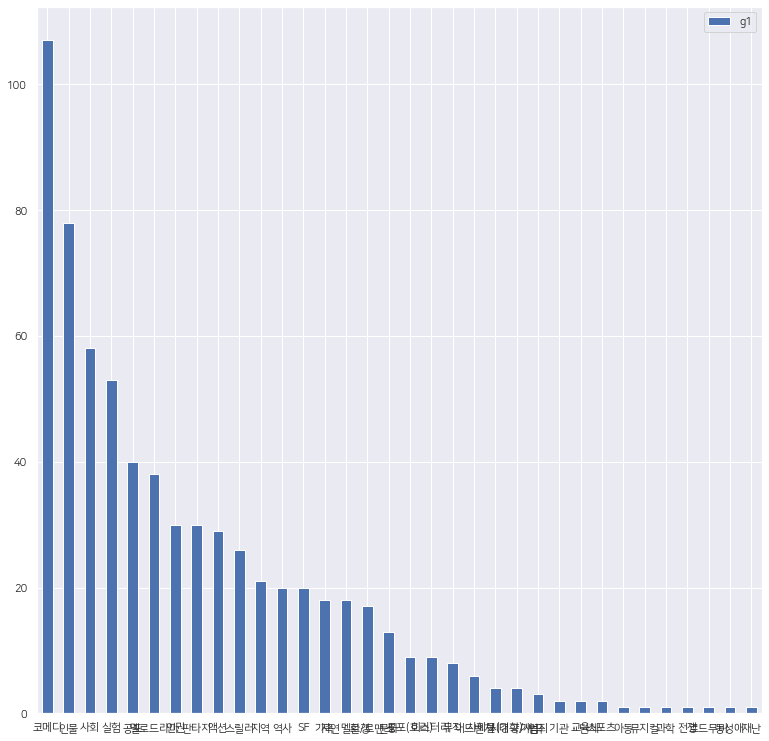

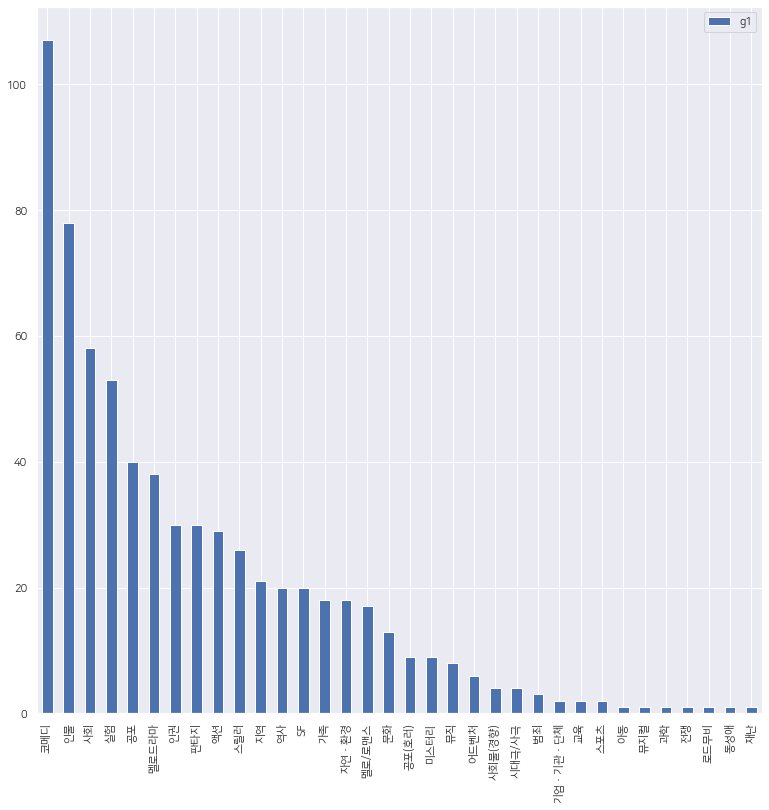

In [133]:

df = pd.DataFrame(item_counts_1[2:])
ax = df.plot.bar(rot=0)

ax = df.plot.bar(stacked=True)

plt.show()

In [115]:
item_counts_2 = genre_df["g2"].value_counts()
print(item_counts_2)

가족          70
판타지         60
드라마         55
코메디         53
멜로드라마       42
스릴러         42
멜로/로맨스      33
사회          32
인물          30
사회물(경향)     24
지역          22
실험          19
인권          18
범죄          14
미스터리        14
자연ㆍ환경       13
액션          12
공포          11
SF          10
청춘영화        10
하이틴(고교)      9
역사           8
스포츠          7
아동           7
문화           6
뮤직           6
동성애          4
기업ㆍ기관ㆍ단체     3
로드무비         3
공포(호러)       3
종교           3
뮤지컬          2
어드벤처         2
과학           2
시대극/사극       2
재난           2
계몽           1
전쟁           1
반공/분단        1
Name: g2, dtype: int64


In [117]:
item_counts_3 = genre_df["g3"].value_counts()
print(item_counts_3)

판타지        23
가족         19
스릴러        16
드라마        12
사회          9
범죄          7
멜로드라마       7
공포          7
인권          6
미스터리        6
코메디         6
청춘영화        5
인물          5
사회물(경향)     5
동성애         3
실험          3
아동          2
뮤지컬         2
역사          2
뮤직          2
재난          2
하이틴(고교)     2
로드무비        2
멜로/로맨스      2
자연ㆍ환경       2
스포츠         2
활극          1
SF          1
액션          1
첩보          1
문화          1
Name: g3, dtype: int64


In [118]:
item_counts_4 = genre_df["g4"].value_counts()
print(item_counts_4)

판타지        3
가족         3
지역         2
스릴러        2
드라마        2
인권         2
인물         1
미스터리       1
반공/분단      1
무협         1
공포         1
사회물(경향)    1
코메디        1
Name: g4, dtype: int64


In [119]:
item_counts_5 = genre_df["g5"].value_counts()
print(item_counts_5)

사회      2
아동      1
미스터리    1
공포      1
지역      1
코메디     1
판타지     1
Name: g5, dtype: int64


SF            30.0
가족            88.0
계몽             NaN
공포            51.0
공포(호러)        12.0
과학             3.0
교육             NaN
기업ㆍ기관ㆍ단체       5.0
기타             NaN
동성애            5.0
드라마         1719.0
로드무비           4.0
멜로/로맨스        50.0
멜로드라마         80.0
문화            19.0
뮤지컬            3.0
뮤직            14.0
미스터리          23.0
반공/분단          NaN
범죄            17.0
사회            90.0
사회물(경향)       28.0
스릴러           68.0
스포츠            9.0
시대극/사극         6.0
실험            72.0
아동             8.0
액션            41.0
어드벤처           8.0
역사            28.0
인권            48.0
인물           108.0
자연ㆍ환경         31.0
재난             3.0
전쟁             2.0
종교             NaN
지역            43.0
청춘영화           NaN
코메디          160.0
판타지           90.0
하이틴(고교)        NaN
dtype: float64

In [60]:
x = genre_df.to_numpy
plt.bar(x, )
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

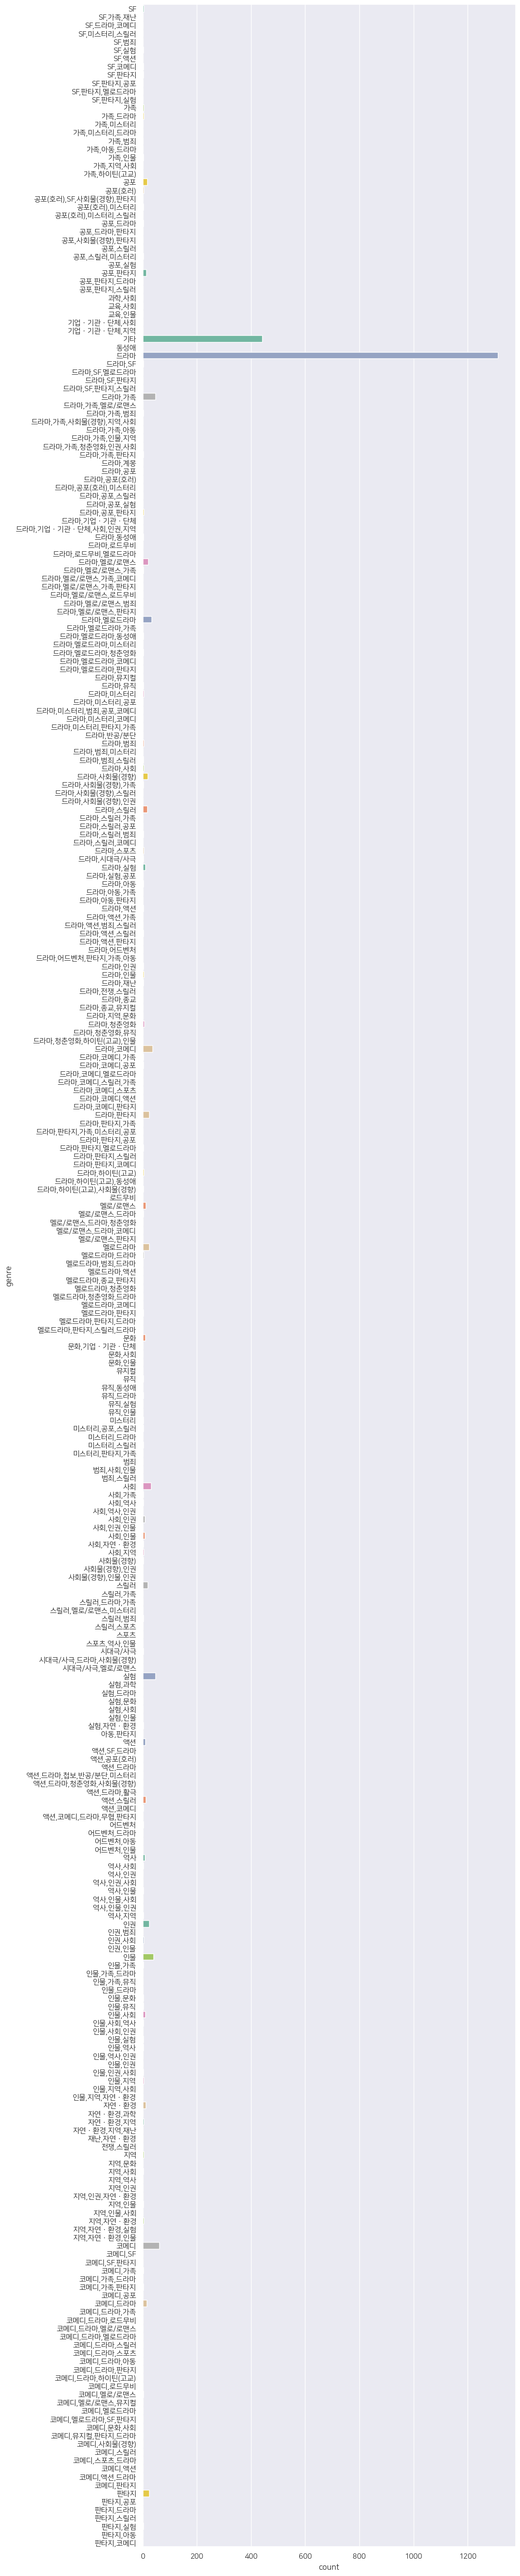

In [54]:
plt.figure(figsize=(10, 70), dpi=100)
sns.countplot(y=movies['genre'].sort_values(), data=movies, palette="Set2")
plt.show()

## 장르 genre DATA => (NEW) DATAset

## heat map

## Yearly Content (Updated || Produced)
year => 2021 - 2000 (22개 그룹)
prodYear => 2021 - 1999 yr

Q. 내림차순이 낫나요? (<) 연도별 순서대로가 낫나요?
뭔가 제 눈에는 너무 난잡해 보이네요.

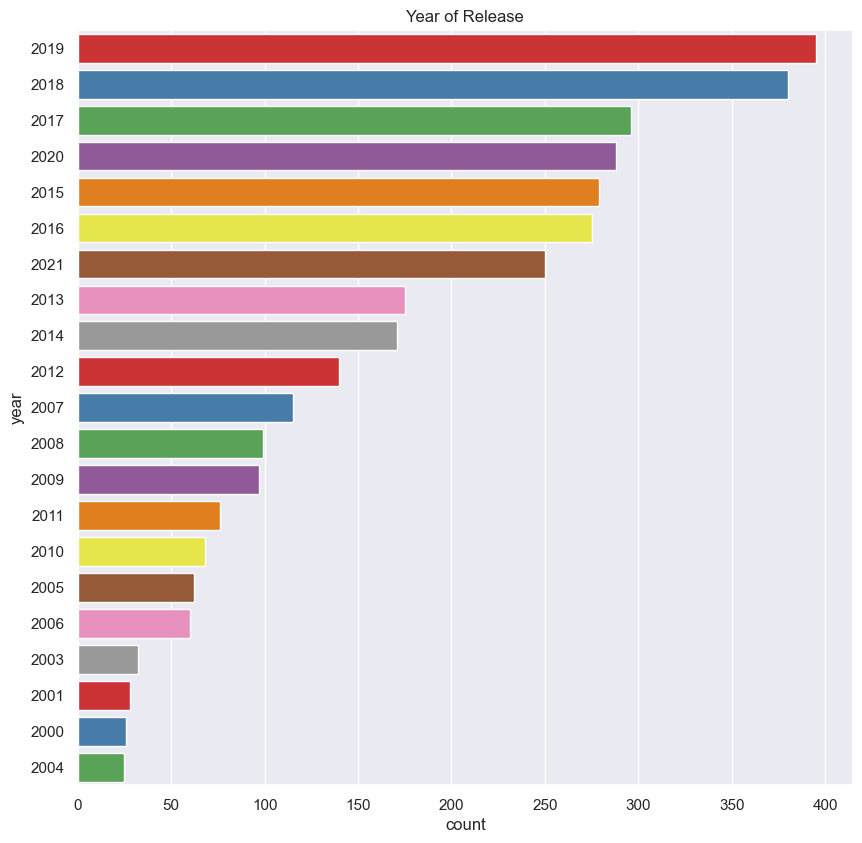

In [22]:
plt.figure(figsize=(10, 10), dpi=100)
sns.countplot(y="year", data=movies,  palette="Set1", order=movies['year'].value_counts().index[0:21])
plt.title('Year of Release')
plt.show()

[] Release(출품) - 제작 년도가 일치하지 않는 경우 꽤 있음.

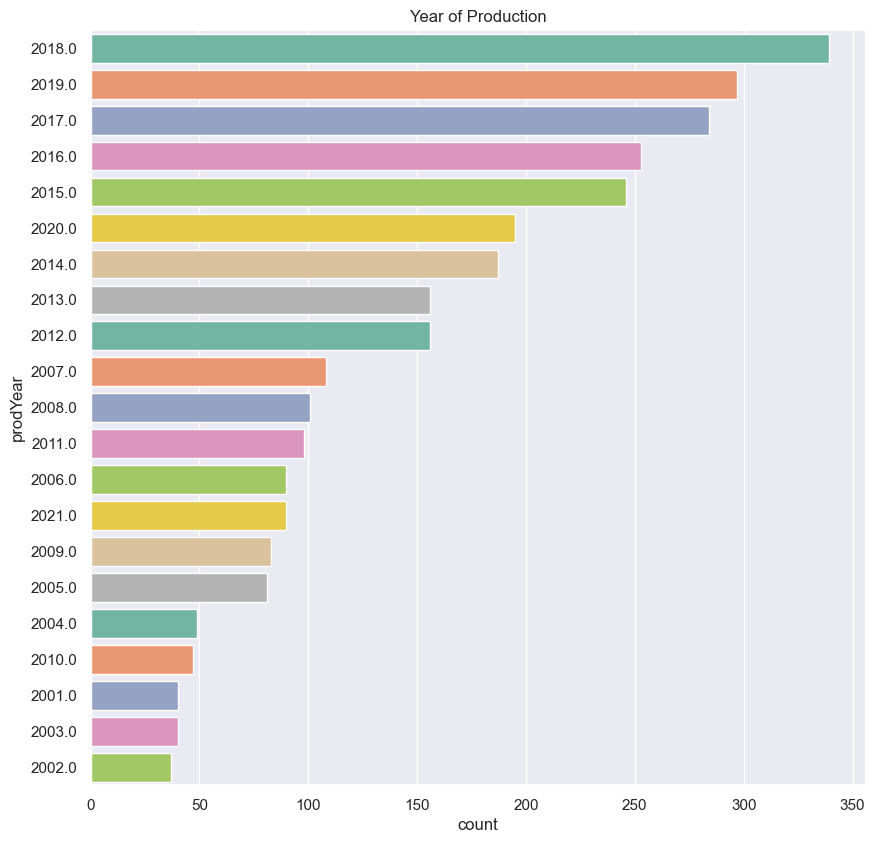

In [23]:
plt.figure(figsize=(10, 10), dpi=100)
sns.countplot(y="prodYear", data=movies, palette="Set2", order=movies['prodYear'].value_counts().index[0:21])
plt.title('Year of Production')
plt.show()

## Exclusive Content
(Added Year >= Release Year)

In [27]:
ls = []
for i in range(movies.shape[0]):
    try:
        if int(movies.iloc[i]['prodYear']) >= movies.iloc[i]['year']:
            ls.append('Exclusive')
        else:
            ls.append('Not Exclusive')
    except:
        ls.append('Not Exclusive')
movies['Exclusive'] = ls
del ls

[] 그냥 편차 그래프로 그리는 게 나을 듯 합니다.

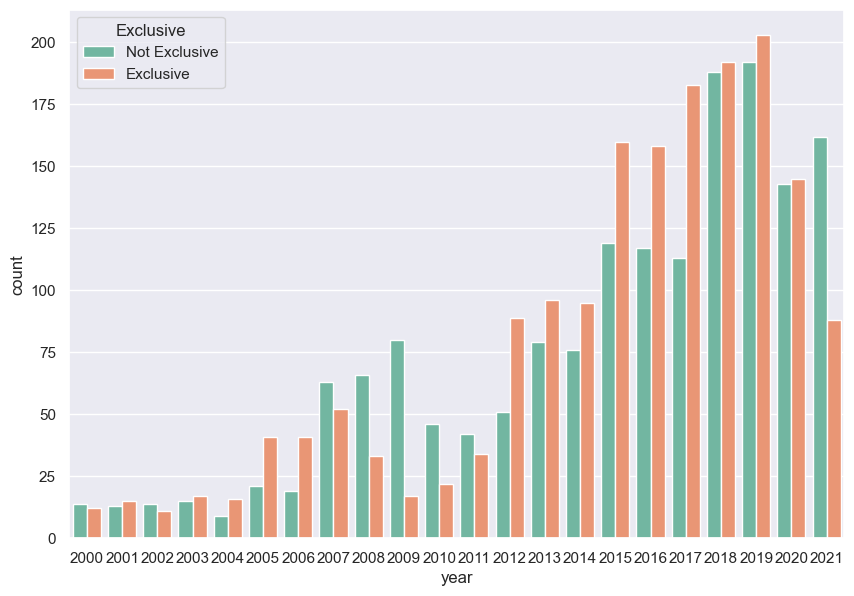

In [29]:
plt.figure(figsize=(10, 7), dpi=100)
sns.countplot(x=movies['year'].sort_values(), hue='Exclusive', data=movies, palette="Set2")
plt.show()

## genre
split

In [37]:
genres = set()
for i in list(movies['genre'].unique()):
    ls = i.split(',')
    genres.update(ls)
len(genres)

45

In [38]:
genres

{'SF',
 '가족',
 '계몽',
 '공포',
 '공포(호러)',
 '과학',
 '교육',
 '기업ㆍ기관ㆍ단체',
 '기타',
 '동성애',
 '드라마',
 '로드무비',
 '멜로/로맨스',
 '멜로드라마',
 '무협',
 '문예',
 '문화',
 '뮤지컬',
 '뮤직',
 '미스터리',
 '반공/분단',
 '범죄',
 '사회',
 '사회물(경향)',
 '스릴러',
 '스포츠',
 '시대극/사극',
 '실험',
 '아동',
 '액션',
 '어드벤처',
 '역사',
 '인권',
 '인물',
 '자연ㆍ환경',
 '재난',
 '전쟁',
 '종교',
 '지역',
 '첩보',
 '청춘영화',
 '코메디',
 '판타지',
 '하이틴(고교)',
 '활극'}

In [34]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/nanumsquarel.ttf").get_name()
rc('font', family=font_name)

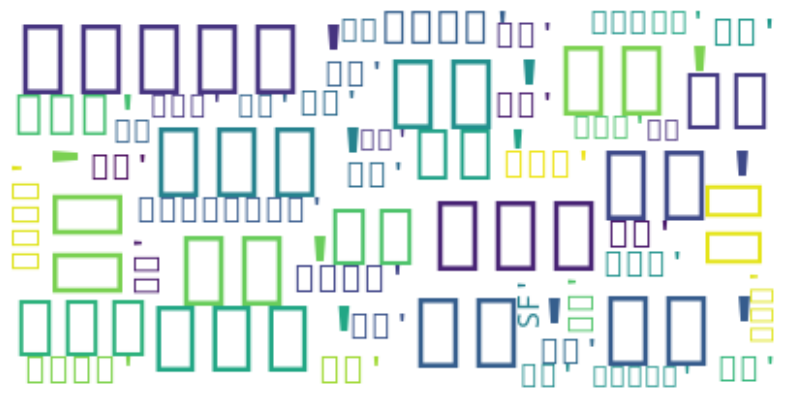

In [39]:
text = list(genres)
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(background_color="white", max_font_size=50).generate(str(text))

plt.figure(figsize=(10, 7), dpi=100)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## DATA preprocessing

In [40]:
movies.fillna('', inplace=True)

In [173]:
print(movies.shape)
# movies.drop_duplicates(['title'], inplace=True) # 되돌리기...
print(movies.shape)

(3362, 14)
(3362, 14)


In [43]:
X = movies['title'] + " " + movies['plot']
X

0       조지아 병들고 가난한 부부가 딸의 억울한 죽음을 규명하기 위해 나선다. 가해자를 밝...
1       미미(美味): 궁극의 식사 미각을 잃은 미식 유튜버 성호는 어딘가 기괴한 음식점에 ...
2                                                 아이즈앤혼즈 
3       절해고도 절해고도. '육지에서 멀리 떨어진 바다의 외딴 섬'이라는 뜻을 지닌 제목은...
4       장갑을 사러 피아노를 가르치는 인경은 연인의 일본 발령 소식에 일본어 학원을 다니기...
                              ...                        
3355    미메시스 TV - 에피소드 1 사람이 컴퓨터 앞에 앉아 있다. 밖에는 디스켓이 날아...
3357    엔조이 유어 썸머 어느 무더운 여름, 아직 회사 생활에 적응하지 못한 한 남자에게 ...
3358    너무 많이 본 사나이 승수는 앞집에 세들어 사는 여자를 몰래 카메라에 담기 위해 친...
3359    아리랑 아리랑 음악에 맞추어 한국 전통 문양들이 생성되고 소멸된다. 연출의도_ 관성...
3361    초촌면 신암리 삭막해진 농촌에서 유기농사를 짓는 주인공은 고집스러움 때문에 마을 사...
Length: 2777, dtype: object

## Vectorizer *****

In [46]:
Vectorizer = TfidfVectorizer() #??